
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

sns.set_style(style='darkgrid')
np.random.seed(100)

%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timesamp']
user_data = pd.read_csv('u.data', sep='\t', names=column_names)
user_data = user_data.drop(columns=['rating'])

In [3]:
item_ids = user_data['item_id'].unique()
items_ids = {item_ids[i] : i for i in range(0, len(item_ids))}
new_ids = [items_ids[i] for i in user_data['item_id'].values]

user_data['item_id'] = new_ids

In [4]:
user_data['timesamp'] = [datetime.fromtimestamp(i) for i in user_data['timesamp'].values]

In [5]:
user_data.head()

,user_id,item_id,timesamp
0,0,0,1997-12-04 17:55:49
1,0,1,1997-12-04 17:55:49
2,0,2,1997-12-04 17:55:49
3,196,3,1997-12-04 17:55:49
4,186,4,1998-04-04 21:22:22


<AxesSubplot:ylabel='Frequency'>

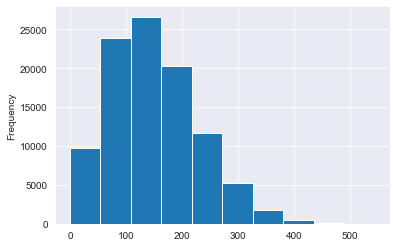

In [6]:
user_data['contribution_val'] = np.random.rayleigh(size=len(user_data), scale=120)
user_data['contribution_val'].plot(kind='hist')

In [7]:
df = pd.read_excel('datadotgov_main.xlsx')

In [8]:
df.head()

,ABN,Charity_Legal_Name,Other_Organisation_Names,Address_Type,Address_Line_1,Address_Line_2,Address_Line_3,Town_City,State,Postcode,...,People_at_risk_of_homelessness,People_with_Chronic_Illness,People_with_Disabilities,Pre_Post_Release_Offenders,Rural_Regional_Remote_Communities,Unemployed_Person,Veterans_or_their_families,Victims_of_crime,Victims_of_Disasters,Youth
0,11000047950,Sydney Missionary & Bible College,NaN,Business,43 Badminton Rd,NaN,NaN,Croydon,New South Wales,2132.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN
1,11000073870,Integricare,NaN,Business,"Suite 8, Level 1,",1-17 Elsie Street,NaN,Burwood,New South Wales,2134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11000761571,Australian Missionary Tidings,NaN,Business,35 Miriam St,NaN,NaN,Holland Park West,Queensland,4121.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN
3,11001233790,"The Greek Orthodox Church & Community Of The ""...",NaN,Business,11 Steel Street,NaN,NaN,HAMILTON,NSW,2303.0,...,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,Y,Y
4,11001241005,Wangarang Industries Limited,NaN,Business,1635 Forest Rd,NaN,NaN,Orange,New South Wales,2800.0,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns = ['Charity_Legal_Name', 
           'Charity_Size', 
           'Operates_in_ACT', 
           'Operates_in_NSW', 
           'Operates_in_NT', 
           'Operates_in_QLD', 
           'Operates_in_SA']

In [10]:
features_table = df[columns]

In [11]:
features_table['Charity_Size'] = [0 if size == 'Small' else 2 if size == 'Medium' else 1 for size in features_table['Charity_Size']]

<ipython-input-11-220cc4b90350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_table['Charity_Size'] = [0 if size == 'Small' else 2 if size == 'Medium' else 1 for size in features_table['Charity_Size']]


In [12]:
features_table.head()

,Charity_Legal_Name,Charity_Size,Operates_in_ACT,Operates_in_NSW,Operates_in_NT,Operates_in_QLD,Operates_in_SA
0,Sydney Missionary & Bible College,1,NaN,Y,NaN,NaN,NaN
1,Integricare,1,NaN,Y,NaN,NaN,NaN
2,Australian Missionary Tidings,1,NaN,NaN,NaN,Y,NaN
3,"The Greek Orthodox Church & Community Of The ""...",2,NaN,Y,NaN,NaN,NaN
4,Wangarang Industries Limited,1,NaN,Y,NaN,NaN,NaN


## Get the Data

In [13]:
table_data = pd.merge(user_data, features_table, left_on='user_id', right_index=True)
table_data.head()

,user_id,item_id,timesamp,contribution_val,Charity_Legal_Name,Charity_Size,Operates_in_ACT,Operates_in_NSW,Operates_in_NT,Operates_in_QLD,Operates_in_SA
0,0,0,1997-12-04 17:55:49,122.951334,Sydney Missionary & Bible College,1,NaN,Y,NaN,NaN,NaN
1,0,1,1997-12-04 17:55:49,113.047777,Sydney Missionary & Bible College,1,NaN,Y,NaN,NaN,NaN
2,0,2,1997-12-04 17:55:49,184.743807,Sydney Missionary & Bible College,1,NaN,Y,NaN,NaN,NaN
3,196,3,1997-12-04 17:55:49,223.236687,St Kilda Mums,1,NaN,NaN,NaN,NaN,NaN
943,196,528,1997-12-04 18:11:03,84.028433,St Kilda Mums,1,NaN,NaN,NaN,NaN,NaN


In [14]:
contributions = table_data[['Charity_Legal_Name', 'contribution_val', 'timesamp']]
#contributors[contributors['Charity_Legal_Name'] == 'Illaroo Co-operative Aboriginal Corporation'])
query = contributions[contributions['Charity_Legal_Name'] == 'St Kilda Mums']
query = query.set_index('timesamp')
query.head()

,Charity_Legal_Name,contribution_val
timesamp,,
1997-12-04 17:55:49,St Kilda Mums,223.236687
1997-12-04 18:11:03,St Kilda Mums,84.028433
1997-12-04 18:08:48,St Kilda Mums,108.325010
1997-12-04 18:01:14,St Kilda Mums,43.193416
1997-12-04 18:09:53,St Kilda Mums,140.191754


In [15]:
contributions['day_time'] = [np.datetime64(i, 'D') for i in contributions['timesamp'].values]

<ipython-input-15-c1bea94cf4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contributions['day_time'] = [np.datetime64(i, 'D') for i in contributions['timesamp'].values]


In [235]:
charities = table_data['Charity_Legal_Name'].unique()
#charity_name = [name for name, date in contributions.index]
#contributions['Name'] = contributions.index.get_level_values(level=0)
np.random.seed(99)
nunber_of_charities = len(charities)

index = np.random.randint(0, nunber_of_charities)
random_charity = charities[index]
query = pd.DataFrame(contributions[contributions['Charity_Legal_Name'] == random_charity].groupby('day_time')['contribution_val'].sum())
query = query.reset_index().melt('day_time', var_name='category', value_name='contribution_val')
query = query.rename(columns={'day_time':"Date", 'contribution_val' : "Total Contributions"})
query['Total Contributions'] = [np.floor(i) for i in query['Total Contributions'].values]
query.head()

<ipython-input-235-5e424c83fb51>:10: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  query = query.reset_index().melt('day_time', var_name='category', value_name='contribution_val')


,Date,category,Total Contributions
0,1997-12-15,contribution_val,13377.0
1,1998-01-09,contribution_val,7652.0
2,1998-01-12,contribution_val,1668.0
3,1998-01-14,contribution_val,3460.0
4,1998-01-15,contribution_val,15977.0


<AxesSubplot:>

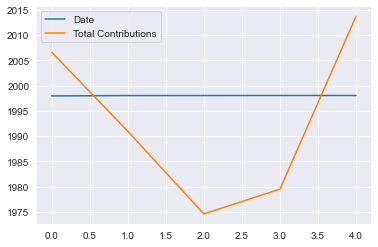

In [224]:
query.plot()

## Visualizing Using Altair

In [252]:
source = query

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Date'], empty='none')

# The basic line
line = alt.Chart(source).mark_area( line={'color':'#52B788'}, point=True,
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='#D8F3DC', offset=0),
               alt.GradientStop(color='#40916C', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
    ).encode(y='Total Contributions:Q', x='Date:T')

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='right', dx=-10, dy=0).encode(
    text=alt.condition(nearest, 'Total Contributions:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Date:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)